In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Assuming your file is in "Optimum.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Optimum_Chip.xlsx'
response = requests.get(url)

with open('document.xlsx', 'wb') as file:
    file.write(response.content) # Update with your file path

# Assign 'document.xlsx' to the file_path variable
file_path = 'document.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

**The Below Clored Charts and Graphs used code from plotly.com which is opensource.  Please see their website for their licensing agreement.**

**The Below Statistics provide an overall glimpse of the Optimum Chip company.  This is a hypothethetical company.  When reading the chart you would generally use the Mean to compare the performance of a company to other companies in the same industry.  The standard deviation will represent the fluctuations within each category.  The greater the fluctuation the more risk a company may carry.  The minimum will represent areas where the company may have not been performing as well.  On the other hand, the maximum will represent areas where the company may have been performing quite well.**

In [3]:
df.describe()

,Year,Revenue_in_Billions,COGS_In_Billions,Gross_Profit_In_Billions,Operating_Expenses_In_Billions,Operating_Income_In_Billions,Net_Income_In_Billions
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2012.500000,107.705128,37.212991,70.492137,35.940883,34.551254,40.102991
std,7.648529,5.038035,8.333851,11.367158,5.457090,7.827828,8.333851
min,2000.000000,100.000000,24.576667,54.630741,24.555556,21.630741,27.466667
25%,2006.250000,103.625000,31.026667,60.452037,32.115741,27.348333,33.916667
50%,2012.500000,107.500000,35.582222,70.240000,36.925926,34.656667,38.472222
75%,2018.750000,111.750000,44.022963,79.315000,40.138889,41.342778,46.912963
max,2025.000000,117.416667,51.665556,90.890000,44.666667,48.423333,54.555556


**If you hover over the below chart you may find the relationship between Revenue, Operating Expenses, Gross Profit and Net Income.  What is interesting about this company is that when expenses reached their peak so to did the Net Income.  Expenses in some respects can be a very important indicator of growth and Net Income.**

In [4]:
import plotly.express as px

fig = px.scatter(df,
                 x="Year",
                 y="Revenue_in_Billions",
                 color="Operating_Expenses_In_Billions",
                 size="Gross_Profit_In_Billions",
                 hover_data=["Net_Income_In_Billions"])

fig.show()



**This company also had an increase in Cost of Goods Sold as Net Income began to rise.  While sometimes improved efficiency can reduce Cost of Goods Sold, decreased efficiency can indicate that sales may be rising faster than the infrastructure of the company can handle creating inefficiencies.  This can also indicate positive growth for a company.**

In [5]:

fig = px.scatter(df, x="Net_Income_In_Billions", y="COGS_In_Billions", trendline="ols")
fig.show()

**This company's Net Income continually rises and peaks in 2018.  There is positive expansion and the expenses continually rise.**

In [6]:


fig = px.pie(df, values='Net_Income_In_Billions', names='Year', title='Net Income in Billions of Optimum Chip By Year')
fig.show()

**Optimum had the highest level of Revenues in 2010.  Most likely as revenues peaked the efficiency of the company began to catch up and by 2025 it may begin to have gained improved company infrastructure which was relative to the growth.**

<ipython-input-7-1914531cbcce>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




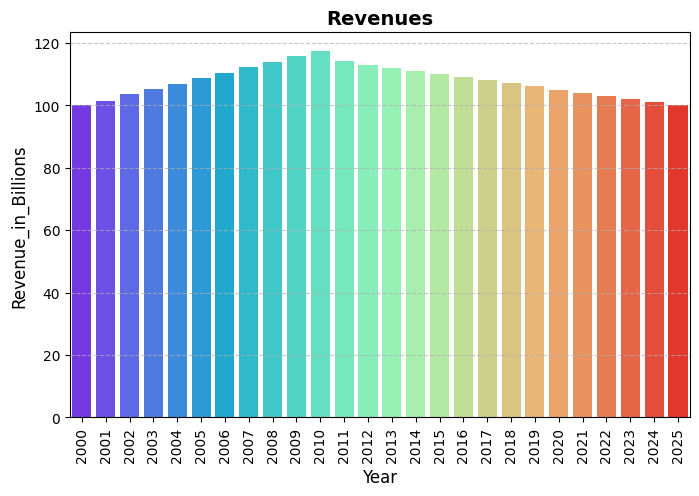

In [7]:
# Set a vibrant color palette
sns.set_palette("husl")  # Other options: "Set2", "Paired", "coolwarm"

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Revenue_in_Billions", data=df, palette="rainbow")

# Customize aesthetics
plt.title("Revenues", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue_in_Billions", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [8]:
fig = px.imshow(df, text_auto=True, aspect="auto")
fig.show()



**The year with the highest level of Revenue was not the year in which Net Income was the greatest.  Net Income peaks eight years following.  Take note of that in the two bubbles in yellow below.**

In [9]:

fig = px.scatter(df, x="Revenue_in_Billions", y="Operating_Expenses_In_Billions", size="Operating_Income_In_Billions", color="Net_Income_In_Billions",
           hover_name="Net_Income_In_Billions", log_x=True, size_max=60)
fig.show()

**In conclusion, increase of overall Expenses as well as Cost of Goods Sold  may signal increased Net Income in years to come.  Rising expenses may not always be a hindrance to a company since the company's infrastructure can begin to slowly improve in efficiency and increase Net Income over time.**